In [1]:
import pandas as pd
import pycaret.classification as classification
import sklearn.preprocessing

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
drop_columns = ["PassengerId", "Name", "Ticket", "Cabin"]
train_df = train_df.drop(columns=drop_columns)
train_df = train_df.dropna()
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
scaler = sklearn.preprocessing.MinMaxScaler()
train_df[["Age", "Fare"]] = scaler.fit_transform(train_df[["Age", "Fare"]])
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.271174,1,0,0.014151,S
1,1,1,female,0.472229,1,0,0.139136,C
2,1,3,female,0.321438,0,0,0.015469,S
3,1,1,female,0.434531,1,0,0.103644,S
4,0,3,male,0.434531,0,0,0.015713,S
...,...,...,...,...,...,...,...,...
885,0,3,female,0.484795,0,5,0.056848,Q
886,0,2,male,0.334004,0,0,0.025374,S
887,1,1,female,0.233476,0,0,0.058556,S
889,1,1,male,0.321438,0,0,0.058556,C


In [7]:
classification.setup(train_df, target="Survived")

,Description,Value
0,Session id,1097
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(712, 8)"
4,Transformed data shape,"(712, 10)"
5,Transformed train set shape,"(498, 10)"
6,Transformed test set shape,"(214, 10)"
7,Numeric features,5
8,Categorical features,2
9,Preprocess,True


In [8]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5964,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0120
lr,Logistic Regression,0.5863,0.5290,0.0548,0.2524,0.0863,0.0012,0.0033,0.5330
ridge,Ridge Classifier,0.5843,0.5215,0.0598,0.2548,0.0921,-0.0009,-0.0062,0.0140
lda,Linear Discriminant Analysis,0.5823,0.5194,0.0648,0.2470,0.0983,-0.0031,-0.0118,0.0130
nb,Naive Bayes,0.5544,0.4962,0.2145,0.4287,0.2510,0.0035,0.0059,0.0140
dt,Decision Tree Classifier,0.5542,0.5353,0.4276,0.4432,0.4318,0.0677,0.0681,0.0120
lightgbm,Light Gradient Boosting Machine,0.5523,0.5049,0.3431,0.4235,0.3734,0.0362,0.0358,0.0560
ada,Ada Boost Classifier,0.5522,0.4845,0.2193,0.3938,0.2804,-0.0037,-0.0061,0.0250
knn,K Neighbors Classifier,0.5500,0.4955,0.3026,0.4236,0.3474,0.0200,0.0221,0.2740
gbc,Gradient Boosting Classifier,0.5462,0.4999,0.2638,0.3971,0.3138,0.0003,-0.0018,0.0270


DummyClassifier(constant=None, random_state=1097, strategy='prior')

In [9]:
model = classification.create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6200,0.6083,0.5500,0.5238,0.5366,0.2149,0.2151
1,0.4600,0.4500,0.4000,0.3478,0.3721,-0.0976,-0.0983
2,0.6200,0.6167,0.6000,0.5217,0.5581,0.2276,0.2294
3,0.4600,0.4150,0.2500,0.2941,0.2703,-0.1538,-0.1551
4,0.5000,0.4750,0.3000,0.3529,0.3243,-0.0684,-0.0689
5,0.6200,0.6250,0.5500,0.5238,0.5366,0.2149,0.2151
6,0.5200,0.5083,0.5000,0.4167,0.4545,0.0323,0.0327
7,0.6200,0.6002,0.4762,0.5556,0.5128,0.2044,0.2060
8,0.5714,0.5371,0.3500,0.4667,0.4000,0.0771,0.0791


In [10]:
tuned_model = classification.tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.5800,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.5918,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


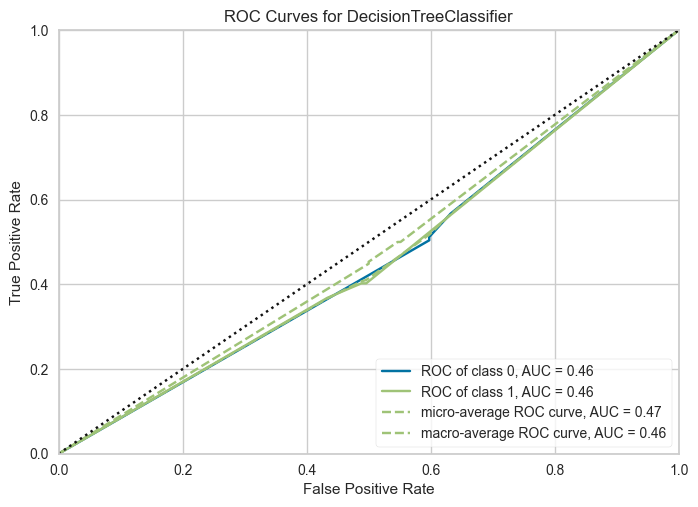

In [11]:
classification.plot_model(model)

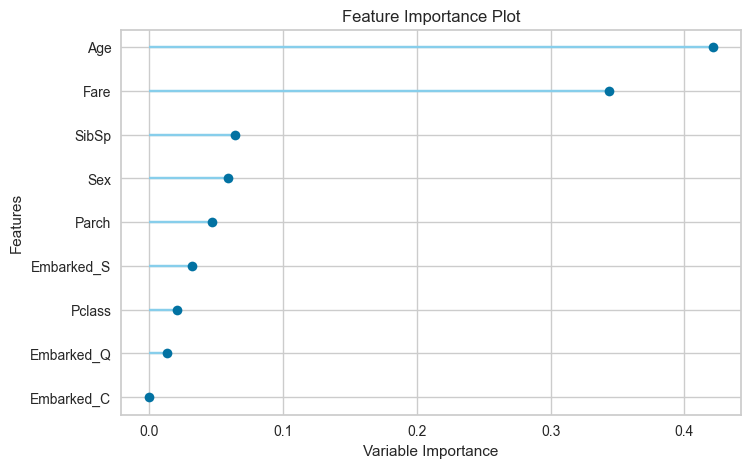

In [12]:
classification.plot_model(model, plot="feature")

In [13]:
final_model = classification.finalize_model(model)

In [20]:
test_df = pd.read_csv("test.csv")

In [21]:
test_df[["Age", "Fare"]] = scaler.transform(test_df[["Age", "Fare"]])
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,0.428248,0,0,330911,0.015282,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.585323,1,0,363272,0.013663,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,0.773813,0,0,240276,0.018909,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,0.334004,0,0,315154,0.016908,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.271174,1,1,3101298,0.023984,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,0.015713,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0.484795,0,0,PC 17758,0.212559,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0.478512,0,0,SOTON/O.Q. 3101262,0.014151,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,0.015713,NaN,S


In [25]:
predicted_df = classification.predict_model(model, test_df)
predicted_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,0.428248,0,0,330911,0.015282,NaN,Q,0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.585323,1,0,363272,0.013663,NaN,S,0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,0.773813,0,0,240276,0.018909,NaN,Q,0,1.0
3,895,3,"Wirz, Mr. Albert",male,0.334004,0,0,315154,0.016908,NaN,S,1,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.271174,1,1,3101298,0.023984,NaN,S,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,0.015713,NaN,S,0,0.5
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0.484795,0,0,PC 17758,0.212559,C105,C,0,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0.478512,0,0,SOTON/O.Q. 3101262,0.014151,NaN,S,0,1.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,0.015713,NaN,S,0,0.5


In [26]:
submit_df = predicted_df[["PassengerId", "prediction_label"]]
submit_df.columns = ["PassengerId", "Survived"]
submit_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [31]:
submit_df.to_csv("submit.csv", index=False)